# LESSON 20

### Sigmoid函数

In [9]:
from matplotlib import pyplot as plt
from matplotlib.animation import FuncAnimation
import networkx as nx
import numpy as np
import random

In [2]:
def sigmoid(x):
    return 1/(1 + np.exp(-x))

In [3]:
sub_x = np.linspace(-10, 10)

In [7]:
def random_linear(x):
    k, b = random.normalvariate(0,1), random.normalvariate(0,1)
    return k * x + b

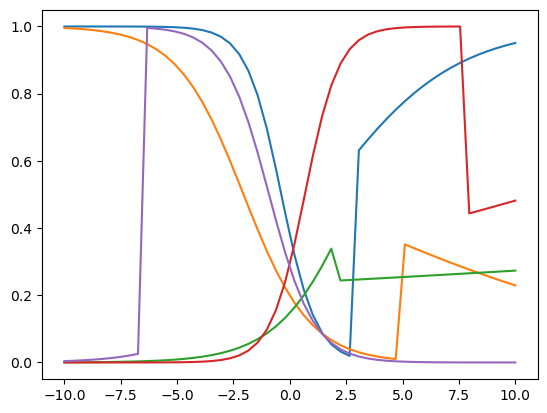

In [8]:
for _ in range(5):
    i = random.choice(range(len(sub_x)))
    linear_output = np.concatenate((random_linear(sub_x[:i]), random_linear(sub_x[i:])))
    i_2 = random.choice(range(len(linear_output)))
    output = np.concatenate((sigmoid(linear_output[:i_2]), sigmoid(linear_output[i_2:])))
    plt.plot(sub_x, output)

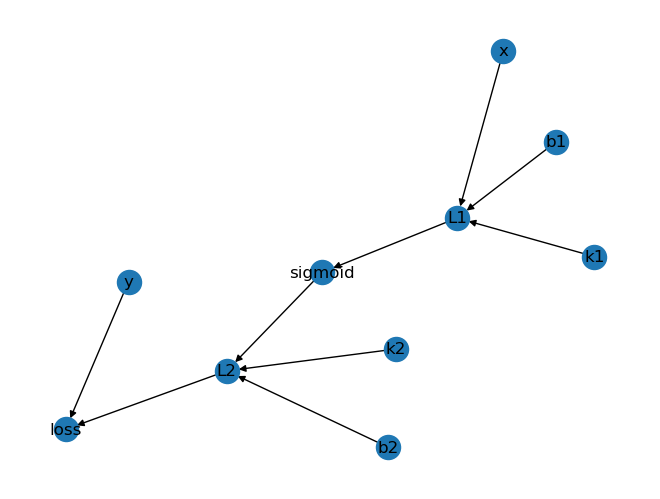

In [12]:
computing_graph = {
    'k1': ['L1'],
    'b1': ['L1'],
    'x': ['L1'],
    'L1':['sigmoid'],
    'sigmoid': ['L2'],
    'k2': ['L2'],
    'b2': ['L2'],
    'L2': ['loss'],
    'y': ['loss']
}

nx.draw(nx.DiGraph(computing_graph), with_labels = True)

In [15]:
def get_output(graph, node):
    outputs = []
    for n, links in graph.items():
        if node == n: outputs += links
    return outputs


In [16]:
get_output(computing_graph, 'k1')

['L1']

In [41]:
def get_paramter_partial_order(p):
    computing_order = []

    target = p
    out = get_output(computing_graph, target)[0]
    computing_order.append(target)

    while out:
        computing_order.append(out)
        out = get_output(computing_graph, out)
        if out: out = out[0]

    order = []

    for i, n in enumerate(computing_order[:-1]):
        order.append((computing_order[i + 1], n))
        # order += ' * ∂{} / ∂{}'.format(n, computing_order[i+1])

    return ' * '.join(['∂{}/∂{}'.format(a, b) for a, b in order[::-1]])

In [43]:
for p in ['b1', 'k1', 'b2', 'k2']:
    print(get_paramter_partial_order(p))

∂loss/∂L2 * ∂L2/∂sigmoid * ∂sigmoid/∂L1 * ∂L1/∂b1
∂loss/∂L2 * ∂L2/∂sigmoid * ∂sigmoid/∂L1 * ∂L1/∂k1
∂loss/∂L2 * ∂L2/∂b2
∂loss/∂L2 * ∂L2/∂k2
